# Module 1: Working in JupyterHub

Let's look at some data.

* **Read this notebook and execute each cell (`SHIFT+ENTER`) as you go!**

## Viewing a data file in a few different ways

We're going to start by exploring a very simple geospatial 'dataset' (consisting of just _one_ point for now!), in a variety of ways. There's a file called  `seec.geojson` in the same folder as this notebook, which you can view in the file browser to the left. That file contains data encoded in the GeoJSON format. In JupyterLab, any GeoJSON file can be viewed from the file browser by double-clicking on it. 

We can also produce an in-notebook link by using the `FileLink` function, which makes it convenient to have links akin to the file browser but for any file we want to make easily accessible to the user in a Notebook. **Run the cell below**, and you can then click on the link that is produced as a result, which will open the file in a new JupyterLab tab:

In [1]:
gjson_file = "seec.geojson"

from IPython.display import FileLink
FileLink(gjson_file)

/home/jovyan/workshop-csdms2025-exercises/examples/module-1/seec.geojson

Jupyter (specifically the `IPython.display` library), includes tools to display a variety of objects programmatically, so the same things you can do in the interface by clicking, also work in code.

Here is how you can show that same file in the notebook as a map widget:

In [2]:
from IPython.display import GeoJSON
GeoJSON(filename=gjson_file)

<IPython.display.GeoJSON object>

## Manipulating the data with Python

We've prepared a simple dataset in an open format, [GeoJSON](https://geojson.org/), which contains one point: The Sustainability, Energy, and Environment Community (SEEC) building where we are now.

When loading this data, we call the variable `gdf`, short for `GeoDataFrame`, an object provided by `geopandas` for tabular geospatial data.

We'll look at the raw data in tabular form, and then plot it:

In [5]:
import geopandas

gdf = geopandas.read_file("seec.geojson")

In [6]:
gdf

,Address,Name,geometry
0,"4001 Discovery Dr., Boulder, CO","Sustainability, Energy, and Environment Commun...",POINT (-105.24207 40.01008)


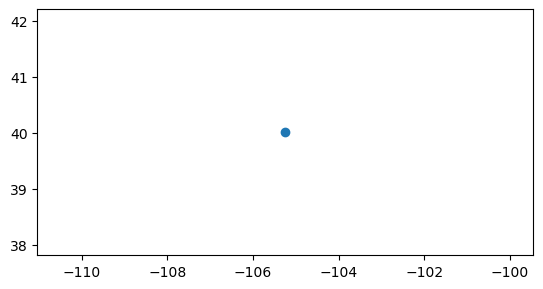

In [7]:
gdf.plot(); # the trailing `;` suppresses printed output, we just want the plot

### That's not a very useful plot, is it?

😉 No! We'll come back to this.

### Let's add another data point.

First, we create a new GeoDataFrame, then we "concatenate" them together.

I got the latitude and Longitude by right-clicking in Google maps.

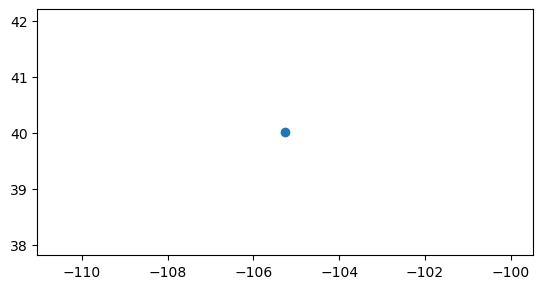

In [8]:
from shapely import Point

nsidc_gdf = geopandas.GeoDataFrame(
    {
        "Address": ["National Snow and Ice Data Center CIRES, 449 UCB University of Colorado Boulder"],
        "Name": ["National Snow and Ice Data Center (NSIDC)"],
        "geometry": [Point(-105.25271574468819, 40.01262175838934)],  # IMPORTANT: Longitude first!
    },
    crs="EPSG:4326",
)

nsidc_gdf.plot();

### Let's combine the two points into one data file.

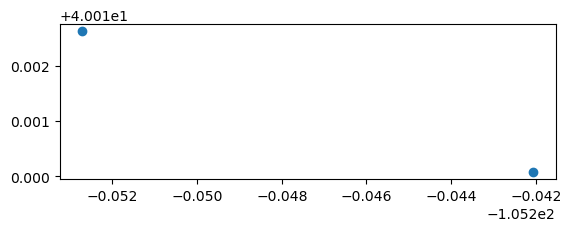

In [9]:
import pandas

# Instead of "mutating" an existing dataframe, we're creating a new one:
combined_gdf = geopandas.GeoDataFrame(pandas.concat([gdf, nsidc_gdf]))
combined_gdf.plot();

### That's not a very useful plot, is it?

Well, we can see that these points are relatively near each-other!

Again, just kidding, we clearly need more. 😉

We could write a bunch of additional code to visualize it effectively, but there are easier ways. We'll look at this in Module 2.

## Save the results

In [10]:
combined_gdf.to_file("seec_and_nsidc.geojson")

## Challenge: Create some data of our own

* **Create a `GeoDataFrame` containing a point that is meaningful to you**:
    * Your favorite coffee shop?
    * The shelter where you adopted your pet?
    * The town where you grew up?

    Hint: Modify code from one of the cells above.

    Hint: Right click on a location in [Google Maps](https://www.google.com/maps) to get a latitude and longitude.

    Hint: Longitude first 😉

In [ ]:
my_gdf = # ... create your GeoDataFrame here!

:::{hint} Solution to the above
:class: dropdown

Here is a solution you can copy/paste, using the location of Fernando's office (taken from Google maps).

```python
my_gdf = geopandas.GeoDataFrame(
    {
        "Address": ["Evans Hall, University Drive, Berkeley, CA 94720"],
        "Name": ["Evans Hall, UC Berkeley"],
        "geometry": [Point( -122.25754047719431, 37.87381567413291)],  # IMPORTANT: Longitude first!
    },
    crs="EPSG:4326",
)
```
::: 

In [ ]:
# Combine all the data together
final_gdf = geopandas.GeoDataFrame(pandas.concat([combined_gdf, my_gdf]))

# Write it out to `final.geojson`.
out_fname = "final.geojson"
final_gdf.to_file(out_fname)

And now, we can look at the complete map:

In [ ]:
GeoJSON(filename=out_fname)

## ✅ Return to the workshop website instructions

Great job completing this notebook! Visit the workshop website by clicking the link below and continue following the instructions where you left off:

<https://csdms2025.workshops.geojupyter.org/modules/working-in-jupyterhub/exercise>